In [1]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Suppress the warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None) # Displaying all the columns
pd.set_option('display.max_rows', 150) # Displaying maximum 150 rows

# Loading all the necessary data

In [4]:
df_current = pd.read_csv('application_data.csv')
df_current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
print(df_current.columns)
print(df_current.shape)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
(307511, 122)


In [6]:
df_current.dtypes.sort_index()  # Getting the information about the data types

AMT_ANNUITY                     float64
AMT_CREDIT                      float64
AMT_GOODS_PRICE                 float64
AMT_INCOME_TOTAL                float64
AMT_REQ_CREDIT_BUREAU_DAY       float64
AMT_REQ_CREDIT_BUREAU_HOUR      float64
AMT_REQ_CREDIT_BUREAU_MON       float64
AMT_REQ_CREDIT_BUREAU_QRT       float64
AMT_REQ_CREDIT_BUREAU_WEEK      float64
AMT_REQ_CREDIT_BUREAU_YEAR      float64
APARTMENTS_AVG                  float64
APARTMENTS_MEDI                 float64
APARTMENTS_MODE                 float64
BASEMENTAREA_AVG                float64
BASEMENTAREA_MEDI               float64
BASEMENTAREA_MODE               float64
CNT_CHILDREN                      int64
CNT_FAM_MEMBERS                 float64
CODE_GENDER                      object
COMMONAREA_AVG                  float64
COMMONAREA_MEDI                 float64
COMMONAREA_MODE                 float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_ID_PUBLISH                   int64


In [7]:
df_previous = pd.read_csv('previous_application.csv')
df_previous.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df_previous.columns)
print(df_previous.shape)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')
(1670214, 37)


In [9]:
df_col_desc = pd.read_csv('columns_description.csv', encoding='ISO-8859-1')  # This provides information about the columns
df_col_desc.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [10]:
df_col_desc.shape

(160, 5)

# Handling Missing Values

In [11]:
df_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
df_current.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [13]:
df_current.isnull().sum().sort_values(ascending=False) # Counting the missing values in each column

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [14]:
# Finding the percentage of missing values
empty_df_per = ((df_current.isnull().sum()/df_current.shape[0])*100).sort_values(ascending=False)  
print(empty_df_per)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [15]:
cols_with_30_percent_missing_values = empty_df_per[empty_df_per.values>=30].index
print(cols_with_30_percent_missing_values)
print(len(cols_with_30_percent_missing_values)) # There are 50 rows with more than 30% missing values

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATI

In [16]:
df_current.drop(cols_with_30_percent_missing_values, axis=1, inplace=True) # Dropping columns with more than 30% missing values

In [17]:
df_current.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [18]:
# Deleting the columns which are irrelavant for the analysis
unwanted=['DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START', 'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'WEEKDAY_APPR_PROCESS_START']
df_current.drop(labels=unwanted,axis=1,inplace=True)

In [19]:
print(df_current.shape)
print(df_current.columns)

(307511, 53)
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
    

In [20]:
# Percentage of missing values in each column
missing_percentage  = (df_current.isnull().sum()/df_current.shape[0]*100).sort_values(ascending=False)
dtypes = df_current.dtypes
missing_and_dtypes = pd.DataFrame({
    'Missing Percentage': missing_percentage,
    'Data Type': dtypes
})
missing_and_dtypes = missing_and_dtypes.sort_values(by=['Missing Percentage'], ascending=False)
print(missing_and_dtypes)


                             Missing Percentage Data Type
EXT_SOURCE_3                          19.825307   float64
AMT_REQ_CREDIT_BUREAU_DAY             13.501631   float64
AMT_REQ_CREDIT_BUREAU_HOUR            13.501631   float64
AMT_REQ_CREDIT_BUREAU_MON             13.501631   float64
AMT_REQ_CREDIT_BUREAU_QRT             13.501631   float64
AMT_REQ_CREDIT_BUREAU_WEEK            13.501631   float64
AMT_REQ_CREDIT_BUREAU_YEAR            13.501631   float64
EXT_SOURCE_2                           0.214626   float64
AMT_GOODS_PRICE                        0.090403   float64
AMT_ANNUITY                            0.003902   float64
CNT_FAM_MEMBERS                        0.000650   float64
FLAG_OWN_CAR                           0.000000    object
NAME_CONTRACT_TYPE                     0.000000    object
FLAG_OWN_REALTY                        0.000000    object
FLAG_DOCUMENT_7                        0.000000     int64
FLAG_DOCUMENT_9                        0.000000     int64
FLAG_DOCUMENT_

We can observe that eleven indexes are there which are having null values and also there dtype is float

In [21]:
missing_and_dtypes.head(11).index  # All the columns with missing values

Index(['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [22]:
# Lets try reducing the missing values in EXT_SOURCE_3
df_current["EXT_SOURCE_3"].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

Since the difference between the median and the mean is extremely low so I think we can fill the empty values with either of the two

In [23]:
# Filling the EXT_SOURCE_3 with median
df_current["EXT_SOURCE_3"].fillna(df_current["EXT_SOURCE_3"].median(),inplace=True)

In [24]:
# Percentage of missing values in each column left
(df_current.isnull().sum()/df_current.shape[0]*100).sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_19

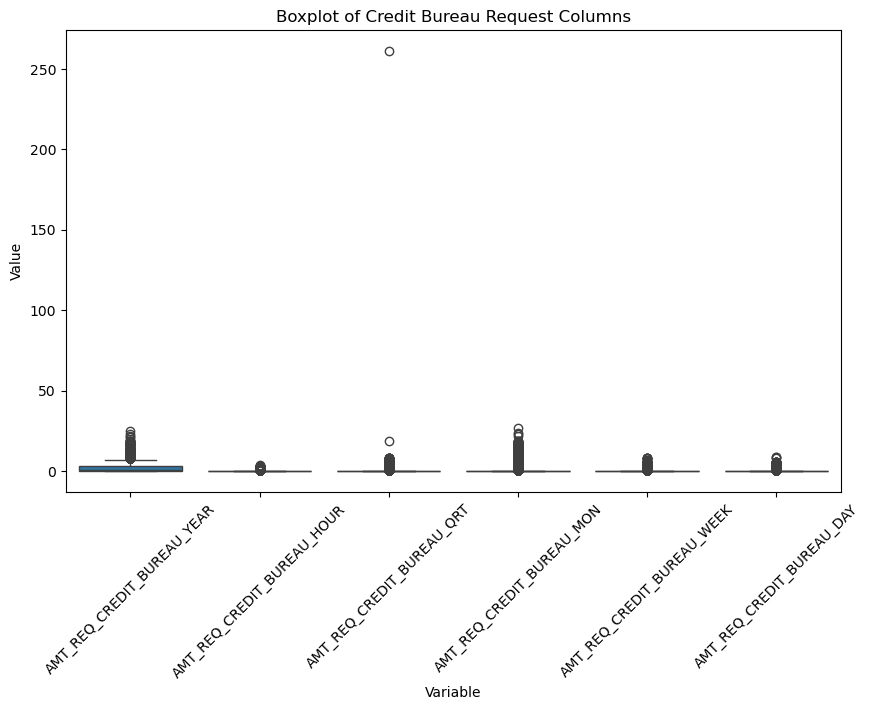

In [25]:
columns_of_interest = [
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY'
]
df_melted = df_current[columns_of_interest].melt(var_name='Variable', value_name='Value')


plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted)
plt.xticks(rotation=45)
plt.title('Boxplot of Credit Bureau Request Columns')
plt.show()

In [26]:
for column in columns_of_interest:
    median_value = df_current[column].median()
    df_current[column].fillna(median_value, inplace=True)

We can see all the columns_of_interest has outliers. Since the fields could be good for computation in future so I can replace the NA values with the median, and then again check the outliers.


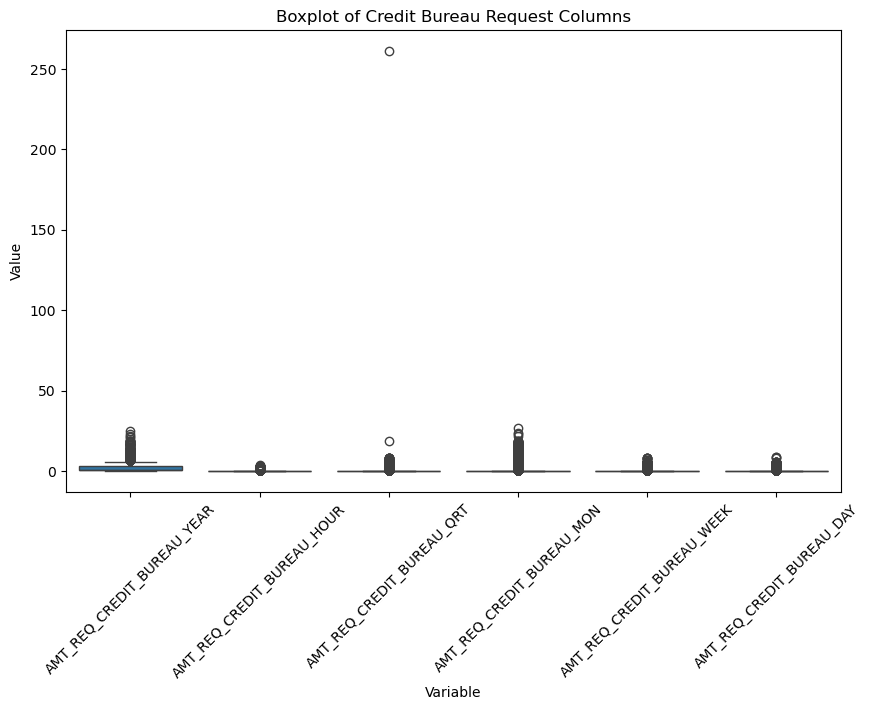

In [27]:
columns_of_interest = [
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY'
]
df_melted = df_current[columns_of_interest].melt(var_name='Variable', value_name='Value')


plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted)
plt.xticks(rotation=45)
plt.title('Boxplot of Credit Bureau Request Columns')
plt.show()

Still the outliers remains after removing the NA values with median, so either we can drop the outliers values or we can set the values of outliers with median values.

In [28]:
# Fill NaN values with the median for the columns of interest
for column in columns_of_interest:
    median_value = df_current[column].median()

    # Calculate IQR
    Q1 = df_current[column].quantile(0.25)
    Q3 = df_current[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    df_current.loc[(df_current[column] < lower_bound) | (df_current[column] > upper_bound), column] = median_value

Now lets come back and check what all empty values are left

In [29]:
# Percentage of missing values in each column left
(df_current.isnull().sum()/df_current.shape[0]*100).sort_values(ascending=False).head(5)


EXT_SOURCE_2       0.214626
AMT_GOODS_PRICE    0.090403
AMT_ANNUITY        0.003902
CNT_FAM_MEMBERS    0.000650
SK_ID_CURR         0.000000
dtype: float64

Only 4 columns are having NA values and that too with less than 1 % so I am dropping the rows where these values are NA

In [30]:
columns_to_check = [
    'EXT_SOURCE_2',
    'AMT_GOODS_PRICE',
    'AMT_ANNUITY',
    'CNT_FAM_MEMBERS'
]

df_current.dropna(subset=columns_to_check, inplace=True)

#### The data is clean now and we can move to further steps of EDA

In [31]:
# Percentage of rows lost in the cleaning process
df_current.shape

(306562, 53)

In [32]:
# Percentage of rows lost during the cleaning process
(1-(df_current.shape[0]/307511))*100

0.3086068465843472

#### Only 0.3% of rows are lost in our data analysis

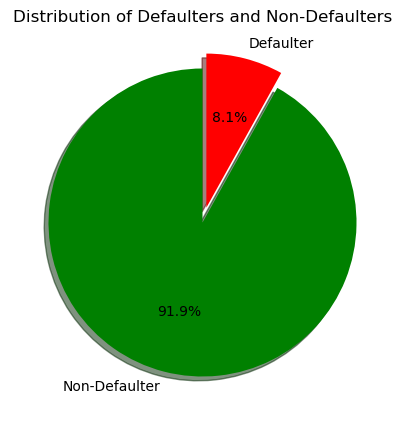

In [33]:
# Analysing the target variable

target_counts = df_current['TARGET'].value_counts(normalize=True)
labels = {0: 'Non-Defaulter', 1: 'Defaulter'}
mapped_labels = [labels[key] for key in target_counts.index]

colors = ['green','red']
explode = (0, 0.1) 

plt.figure(figsize=(5,5))
plt.pie(target_counts, labels=mapped_labels, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True)

plt.title('Distribution of Defaulters and Non-Defaulters')
plt.show()

In [34]:
# Creating a separate dataframe for defaulters and non-defaulters
df_defaulters = df_current[df_current['TARGET'] == 1]
df_non_defaulters = df_current[df_current['TARGET'] == 0]

## Univariate and Bivariate Analysis 


[Text(0.5, 0, 'Gender')]

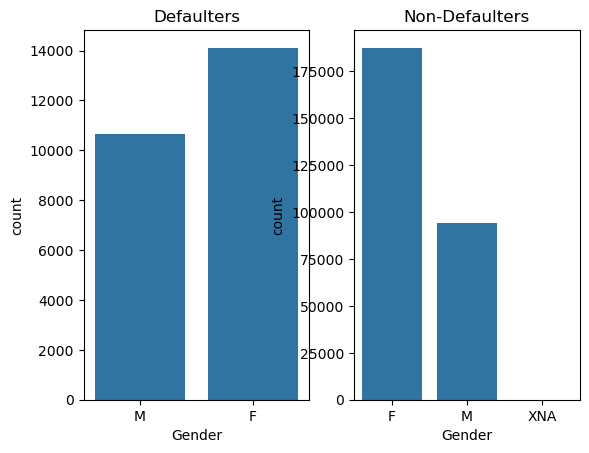

In [35]:
# Plotting the distribution of the target variable
# Gender wise defaulters


plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df_defaulters)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=df_non_defaulters)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

##### Analysis
1 Defaulters:
- Among the defaulters, we observe a slightly higher number of females compared to males.
- This suggests that female borrowers are more likely to default on their obligations.

2 Non-Defaulters:
- Similarly, among the non-defaulters, the trend persists: there are more females than males.
- Non-defaulting female borrowers outnumber their male counterparts.

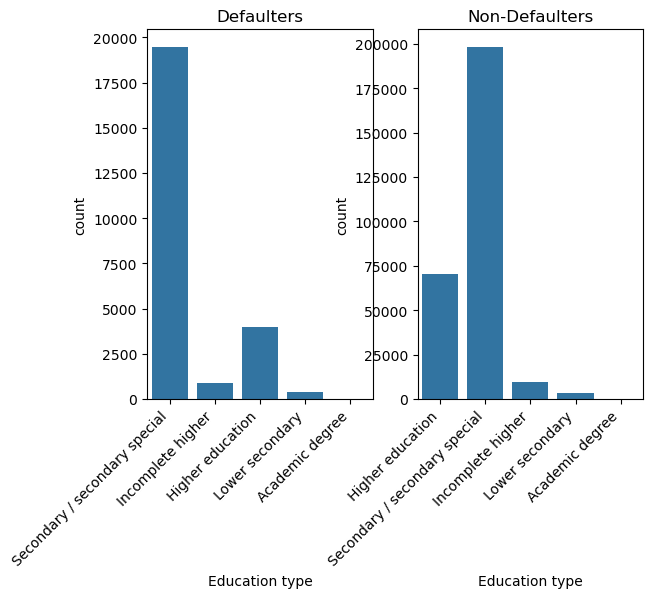

In [36]:
# Education wise defaulters

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_defaulters)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_non_defaulters)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

1 Defaulters:
- Among the borrowers who defaulted, a significant proportion had a secondary or secondary special education level.
- This suggests that individuals with lower educational attainment may be more prone to defaulting on their obligations.

2 Non-Defaulters:
- Similarly, among the non-defaulting borrowers, the trend persists: a higher number of individuals with secondary or secondary special education levels.
- Non-defaulting borrowers in this category outnumber those with higher educational qualifications.

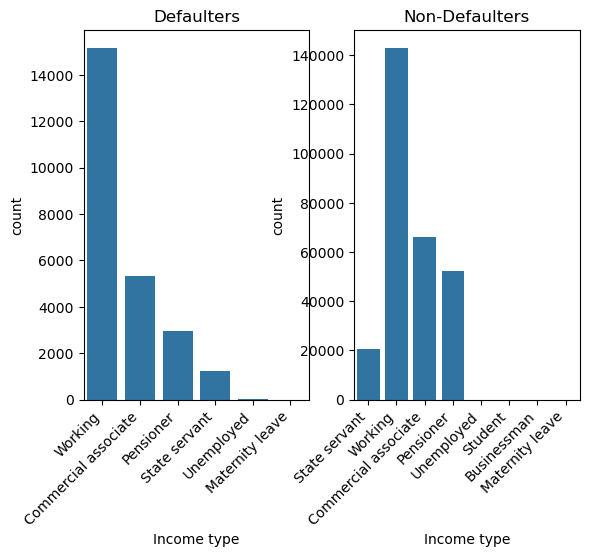

In [37]:
# Defaulters on the basis of Income type

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_defaulters)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_non_defaulters)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

1 Defaulters:
- Among the borrowers who defaulted, a significant proportion were working professionals.
- Their higher representation suggests that individuals in the workforce are more likely to default on their obligations.

2 Non-Defaulters:
- Similarly, among the non-defaulting borrowers, the trend persists: a larger number of working professionals.
- Non-defaulting borrowers in this category outnumber those from other professions.

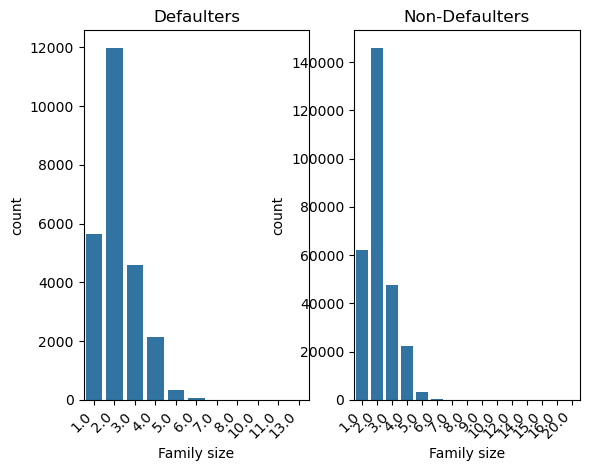

In [38]:
# Defaulters on the basis of Family size

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CNT_FAM_MEMBERS',data=df_defaulters)
plt.title('Defaulters')
ax.set(xlabel='Family size')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CNT_FAM_MEMBERS',data=df_non_defaulters)
plt.title('Non-Defaulters')
ax.set(xlabel='Family size')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

There seems to be a similar pattern for defaulters and non defaulters irrespective of the family size

<Axes: title={'center': 'Non Defaulters'}, xlabel='AMT_ANNUITY', ylabel='Density'>

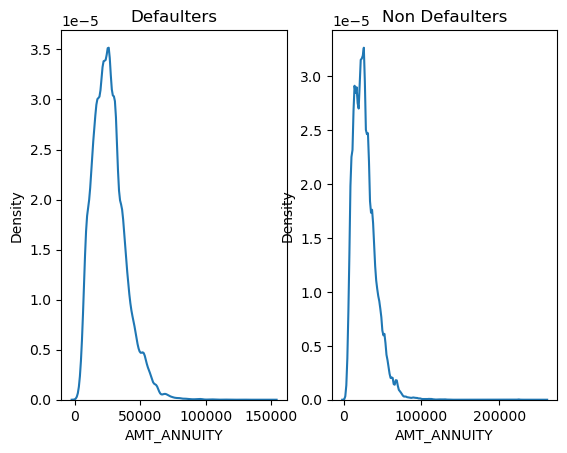

In [39]:
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_defaulters['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_non_defaulters['AMT_ANNUITY'],hist=False)

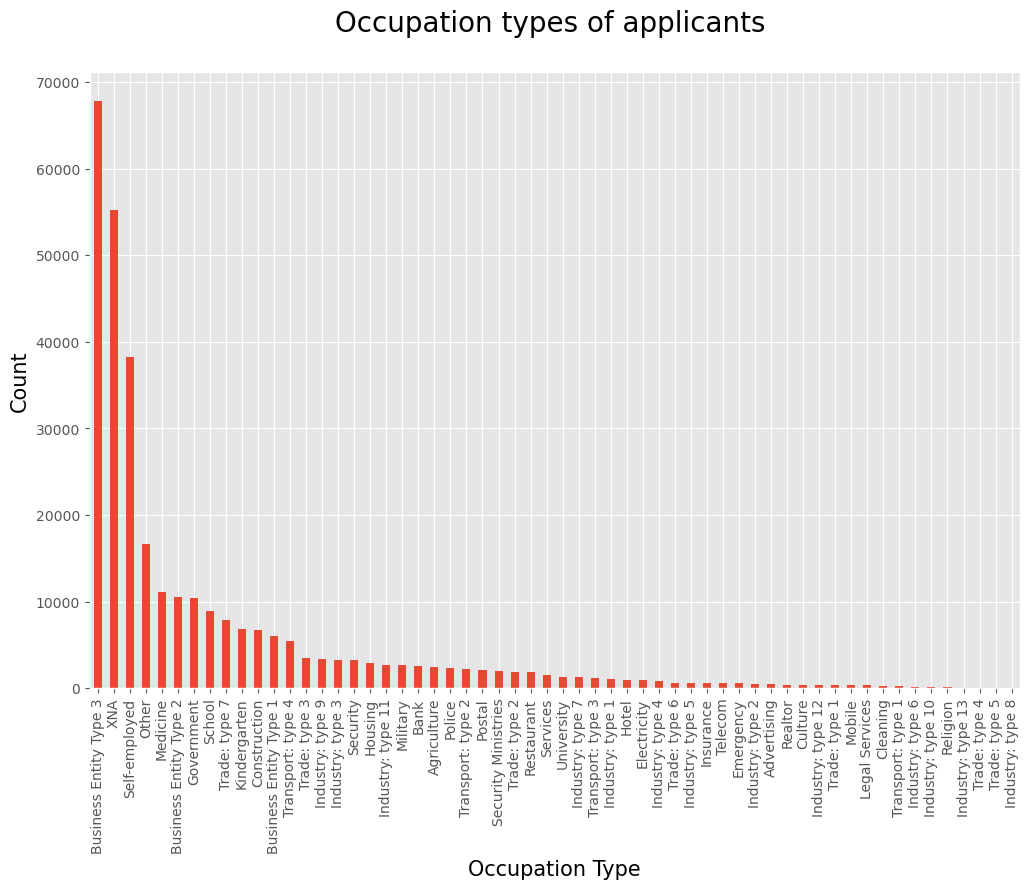

In [40]:
plt.figure(figsize=[12,8])
plt.style.use('ggplot')
df_current['ORGANIZATION_TYPE'].value_counts().plot.bar()
plt.title('Occupation types of applicants \n', fontsize=20) # Setting the title for the plot
plt.xlabel('Occupation Type', fontsize=15, color='k')
plt.ylabel('Count',fontsize=15, color='k')
plt.show()

From the plot above, we can see that the majority of loan applications come from ‘Business Entity Type 3,’ followed by ‘Self-employed.’ ‘Industry: Type 8’ has the fewest loan applications.

In [41]:
# Checking the imbalance for house & flat ownership
df_current['FLAG_OWN_REALTY'].value_counts(normalize=True)

FLAG_OWN_REALTY
Y    0.693569
N    0.306431
Name: proportion, dtype: float64

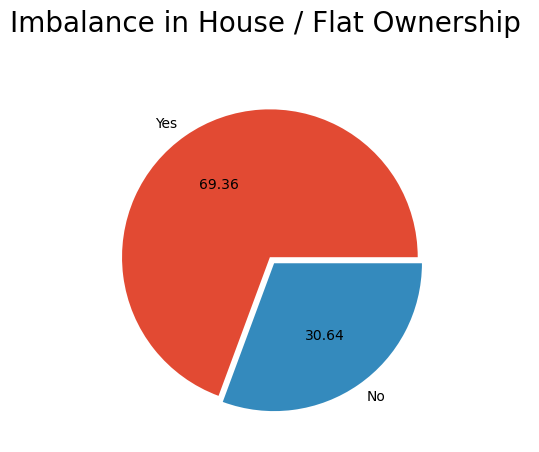

In [42]:

plt.pie(df_current['FLAG_OWN_REALTY'].value_counts(normalize=True), labels=['Yes', 'No'],explode=(0,0.05), autopct='%.2f')
plt.title('Imbalance in House / Flat Ownership \n', fontsize=20) # Setting the title for the plot
plt.show()

Around **69.37%** of clients owns flat while **30.63%** of client don't

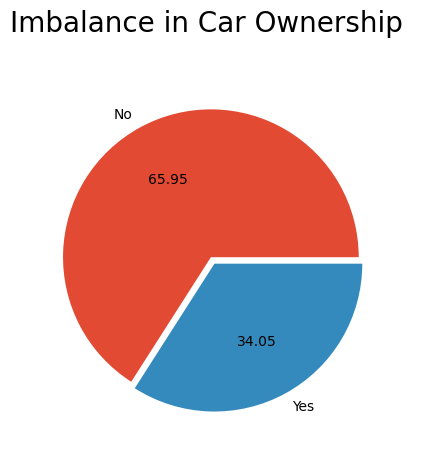

In [43]:
# Similarly for car ownership imbalance

# plt.figure(figsize=[8,6]) # Setting the plot size for ease of readabilty
plt.pie(df_current['FLAG_OWN_CAR'].value_counts(normalize=True), labels=['No', 'Yes'],explode=(0,0.05), autopct='%.2f')
plt.title('Imbalance in Car Ownership \n', fontsize=20) # Setting the title for the plot
plt.show()

In [44]:
# Analysizing Age group and checking what inference we can make of it

df_current.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCU

**Age Group Analysis**

In [45]:
# Converting DaysBirth to AGE and doing further analysis on that

df_current['AGE'] = abs(df_current['DAYS_BIRTH'] // 365)
df_current['AGE'].describe()

count    306562.000000
mean         44.434933
std          11.952605
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: AGE, dtype: float64

In [46]:
# Define a function for categorizing age groups
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 60:
        return 'Mid Age'
    else:
        return 'Senior'

In [47]:
# Creating AGE_GROUP column

df_current["AGE_GROUP"] = df_current['AGE'].apply(categorize_age)

In [48]:
# Calculate percentage of each age group in defaulters
defaulters_percentage = df_current[df_current['TARGET'] == 1]['AGE_GROUP'].value_counts(normalize=True) * 100

In [49]:
df_age_defaulters = defaulters_percentage.reset_index()
df_age_defaulters

,AGE_GROUP,proportion
0,Mid Age,74.135423
1,Young,17.295572
2,Senior,8.569005


In [50]:
# Calculate percentage of each age group in non-defaulters
non_defaulters_percentage = df_current[df_current['TARGET'] == 0]['AGE_GROUP'].value_counts(normalize=True) * 100
df_age_non_defaulters = non_defaulters_percentage.reset_index()
df_age_non_defaulters


,AGE_GROUP,proportion
0,Mid Age,74.142862
1,Senior,14.176928
2,Young,11.680210


Text(0.5, 1.0, 'Non-Defaulters')

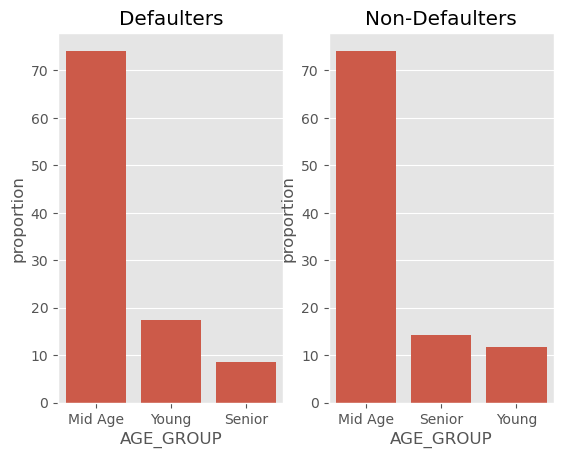

In [51]:
# sns plot for df_age_defaulters and df_age_non_defaulters

plt.subplot(1,2,1)
sns.barplot(x='AGE_GROUP',y='proportion',data=df_age_defaulters)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='proportion',data=df_age_non_defaulters)
plt.title('Non-Defaulters')

1 Defaulters 
- Young people are more likely to default compared to the other two age groups. In contrast, senior citizens are less likely to default than others.

2 Non-defaulters 
- There is not much difference in the likelihood of non-defaulting across the age groups.

**Credit Grouping**

In [52]:
# Similary creating a group for credit 
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [53]:
df_current['CREDIT_GROUP'] = df_current['AMT_CREDIT'].apply(credit_group)
df_current.CREDIT_GROUP.value_counts(normalize=True)*100


CREDIT_GROUP
Low       48.491985
High      30.321436
Medium    21.186579
Name: proportion, dtype: float64

In [54]:
# Calculate percentage of each age group in defaulters
credit_defaulters_percentage = df_current[df_current['TARGET'] == 1]['CREDIT_GROUP'].value_counts(normalize=True) * 100
credit_defaulters_percentage

CREDIT_GROUP
Low       50.707014
Medium    24.830317
High      24.462670
Name: proportion, dtype: float64

In [55]:
df_credit_defaulters = credit_defaulters_percentage.reset_index()

In [56]:
# Calculate percentage of each age group in defaulters
credit_non_defaulters_percentage = df_current[df_current['TARGET'] == 0]['CREDIT_GROUP'].value_counts(normalize=True) * 100
credit_non_defaulters_percentage

CREDIT_GROUP
Low       48.297434
High      30.836024
Medium    20.866541
Name: proportion, dtype: float64

In [57]:
df_credit_non_defaulters = credit_non_defaulters_percentage.reset_index()
df_credit_non_defaulters

,CREDIT_GROUP,proportion
0,Low,48.297434
1,High,30.836024
2,Medium,20.866541


Text(0.5, 1.0, 'Non-Defaulters')

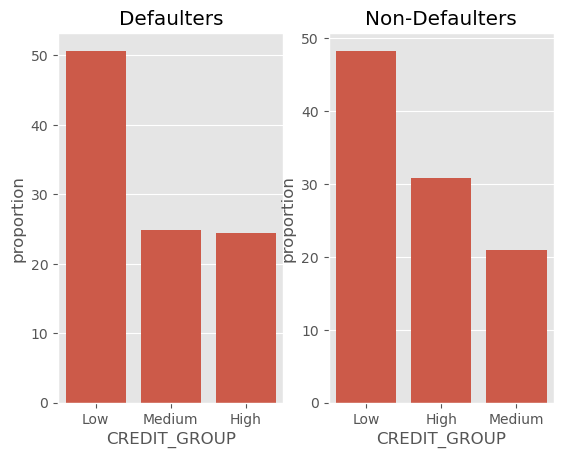

In [58]:
# sns plot for df_credit_defaulters and df_credit_non_defaulters

plt.subplot(1,2,1)
sns.barplot(x='CREDIT_GROUP',y='proportion',data=df_credit_defaulters)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='CREDIT_GROUP',y='proportion',data=df_credit_non_defaulters)
plt.title('Non-Defaulters')

1 Defaulters 
- People who have AMT_CREDIT lower than ₹100000 have the high chance of defaulting in contrast to other salary brackets, so as the AMT_CREDIT increases there is a high chance of non defaulters.

2 Non-defaulters 
- Same pattern seems to have been followed for Non_Defaulters as well.

**Income Grouping**

In [59]:
# Similarly creating a income group
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'

In [60]:
df_current['INCOME_GROUP'] = df_current['AMT_INCOME_TOTAL'].apply(income_group)
df_current.INCOME_GROUP.value_counts(normalize=True)*100

INCOME_GROUP
High      49.550173
Medium    29.771139
Low       20.678688
Name: proportion, dtype: float64

In [61]:
# Calculating the percentage of defaulters 
income_defaulters_percentage = df_current[df_current['TARGET'] == 1]['INCOME_GROUP'].value_counts(normalize=True) * 100
income_defaulters_percentage

INCOME_GROUP
High      47.224467
Medium    31.787330
Low       20.988203
Name: proportion, dtype: float64

In [62]:
# Calculating the percentage of non_defaulters
income_non_defaulters_percentage = df_current[df_current['TARGET'] == 0]['INCOME_GROUP'].value_counts(normalize=True) * 100
income_non_defaulters_percentage

INCOME_GROUP
High      49.754444
Medium    29.594053
Low       20.651503
Name: proportion, dtype: float64

In [63]:
df_income_defaulters = income_defaulters_percentage.reset_index()
df_income_non_defaulters = income_non_defaulters_percentage.reset_index()


Text(0.5, 1.0, 'Non-Defaulters')

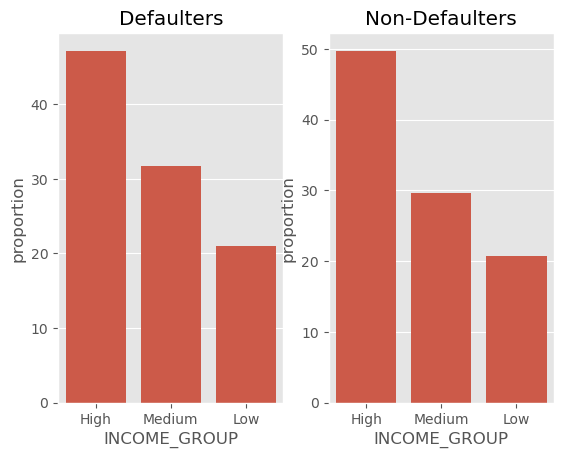

In [64]:
# sns plot for df_income_defaulters and df_income_non_defaulters

plt.subplot(1,2,1)
sns.barplot(x='INCOME_GROUP',y='proportion',data=df_income_defaulters)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='INCOME_GROUP',y='proportion',data=df_income_non_defaulters)
plt.title('Non-Defaulters')

1 Defaulters 
- High Salary people have a high chance of defaulting the loan whereas lower the salary, lower is the chance of defaulting.

2 Non-defaulters 
- Same pattern seems to have been followed for Non_Defaulters as well.

#### Analysis on categorical variable

In [65]:
# Picking Categorical Variables
categories_df = df_current.dtypes.sort_values(ascending=False).reset_index()
categories_list = categories_df[categories_df[0]=="object"]["index"].to_list()
print(categories_list)

['INCOME_GROUP', 'NAME_HOUSING_TYPE', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CREDIT_GROUP', 'AGE_GROUP', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']


In [66]:
def plot_category_proportions(df, column_name, xsize=10, ysize=20):
    # Calculate the proportions
    df_proportions = df[column_name].value_counts(normalize=True).reset_index()
    df_proportions.columns = [column_name, 'proportion']
    
    # Plot the data
    plt.figure(figsize=(xsize, ysize))
    plt.barh(df_proportions[column_name], df_proportions['proportion'], color='skyblue')
    plt.xlabel('Proportion')
    plt.ylabel(column_name.replace('_', ' ').title())
    plt.title(f'Proportion of Different {column_name.replace("_", " ").title()}s')
    plt.gca().invert_yaxis()  # To display the highest proportion on top
    plt.show()

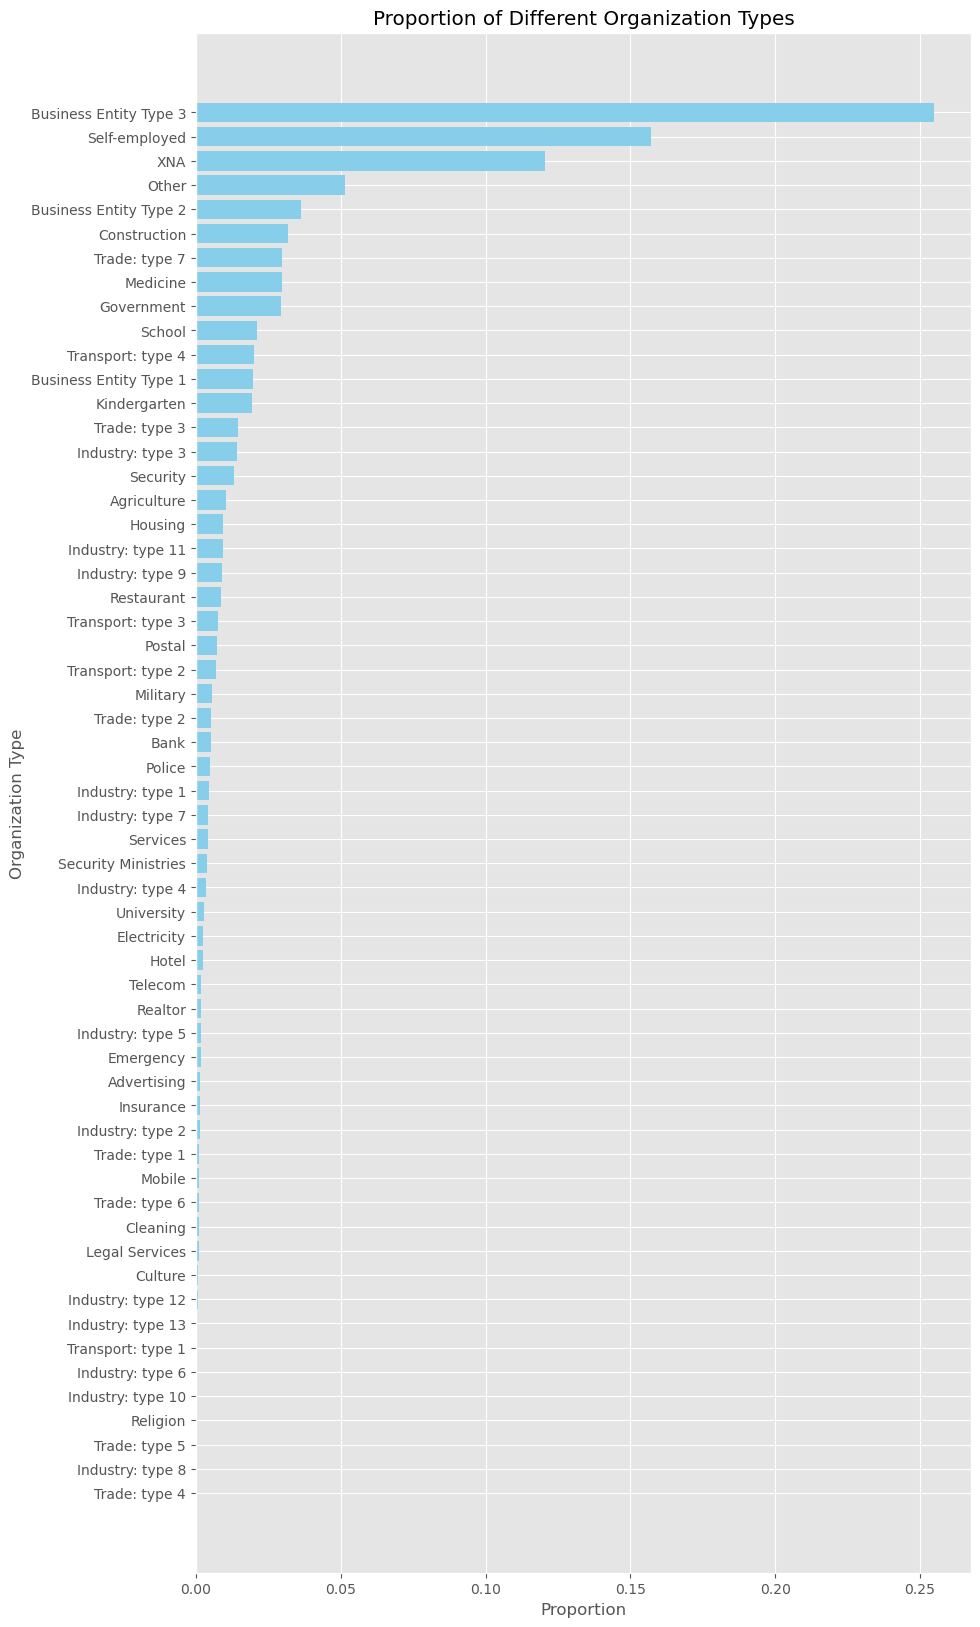

In [67]:
plot_category_proportions(df_defaulters, "ORGANIZATION_TYPE")

**Business Entity Type** 3 are the highest defaulters in the ORGANIZATION_TYPE

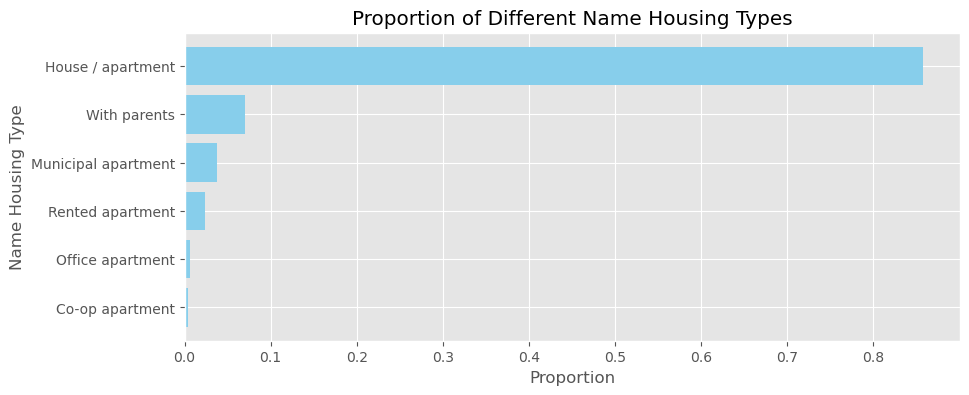

In [68]:
plot_category_proportions(df_defaulters, "NAME_HOUSING_TYPE",10,4)

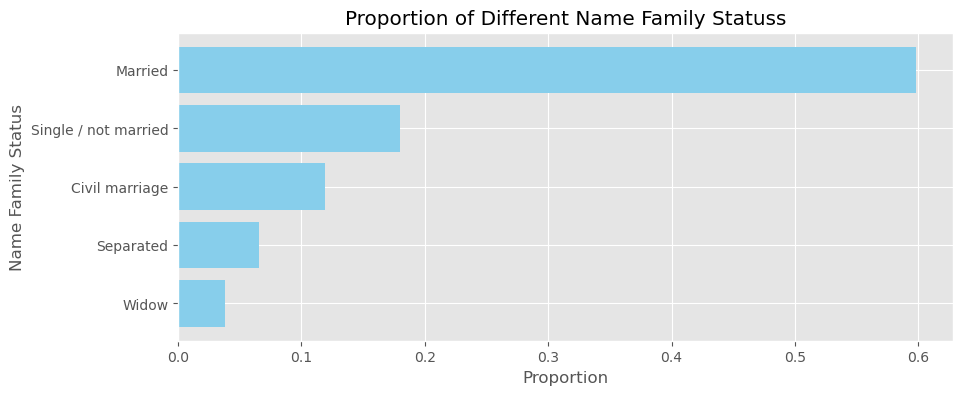

In [69]:
# NAME_FAMILY_STATUS
plot_category_proportions(df_defaulters, "NAME_FAMILY_STATUS",10,4)

Peope who are Married have a tendancy to take a loan and default more

### Bivariate Analysis

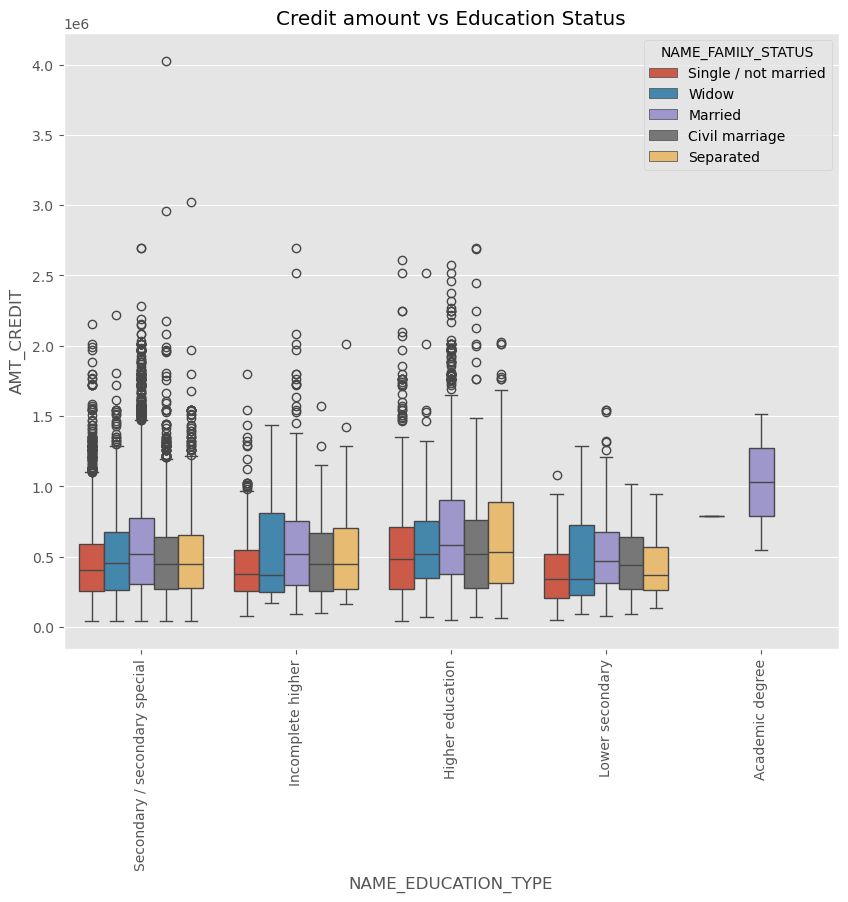

In [70]:
# 
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.boxplot(data =df_defaulters, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above box plot, we can conclude that individuals with a family status of 'married" who have an academic degree tend to have a higher number of credits than others. Additionally, those with higher education and a family status of 'marriage', 'single', and 'Widow' exhibit more outliers.


### Doing some EDA previous_application csv file

In [71]:
df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


There seems to be XNA and XAP values in columns, which can be replaced with np.NaN for the ease of Analysis

In [72]:
df_previous=df_previous.replace("XNA",np.nan)
df_previous=df_previous.replace("XAP",np.nan)


<Axes: ylabel='NAME_CONTRACT_STATUS'>

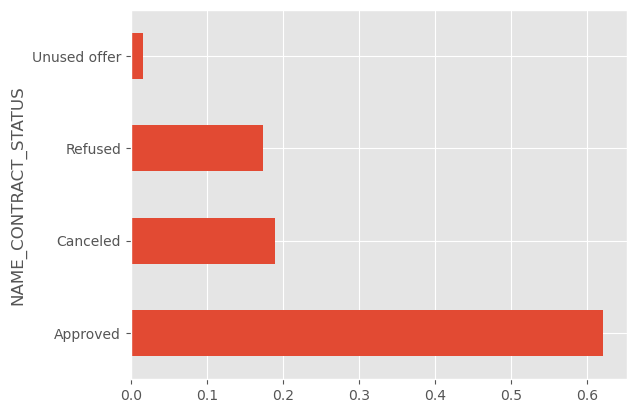

In [73]:
# Analysing NAME_CONTRACT_STATUS column
df_previous["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.barh()

We can see that most of the loans were Approved while the count of Unused offers was extremely low


<Axes: ylabel='NAME_CONTRACT_TYPE'>

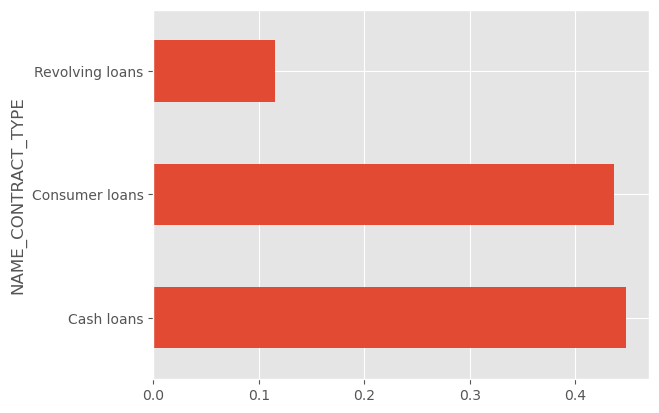

In [74]:
# Analysing NAME_CONTRACT_TYPE
df_previous['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.barh()

Most of the clients prefer Consumer loans and Cash loans over Revolving loans

<Axes: ylabel='proportion'>

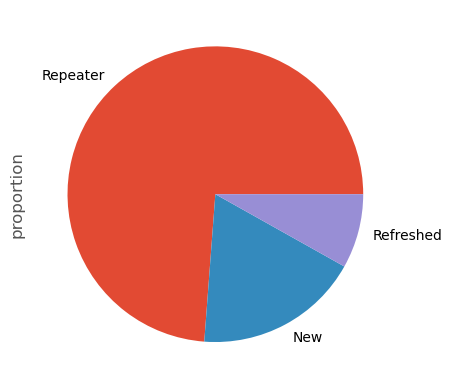

In [75]:
# Analysing NAME_CLIENT_TYPE
df_previous['NAME_CLIENT_TYPE'].value_counts(normalize=True).plot.pie()

Most of the loan applications are from the Repeater client and the New Clients rather than refreshed clients

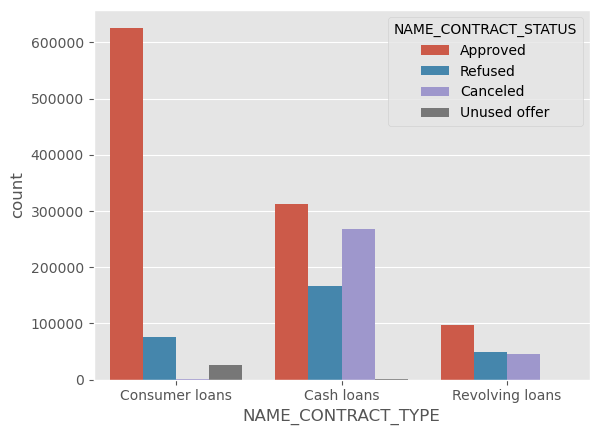

In [76]:
# Analysing NAME_CONTRACT_TYPE and NAME_CONTRACT_STATUS columns together

sns.countplot(x="NAME_CONTRACT_TYPE", hue="NAME_CONTRACT_STATUS", data = df_previous)
plt.show()

We can analyse that
- Most of the Consumer loans are approved in comparison to Refused loans.
- For Cash loans most of the loans were approved but comparitively loans were cancelled and refused as well.

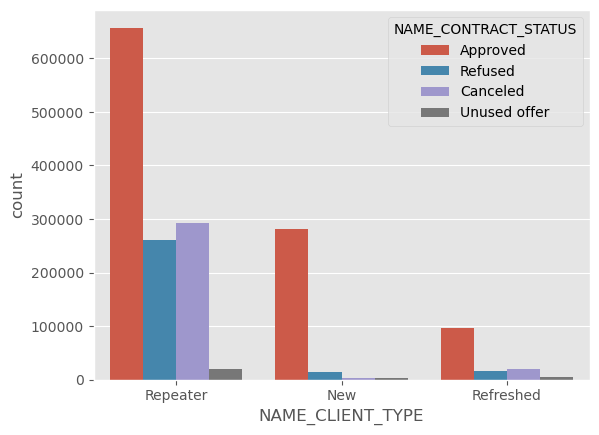

In [77]:

sns.countplot(x='NAME_CLIENT_TYPE', data=df_previous, hue='NAME_CONTRACT_STATUS')
plt.show()

The majority of applications from Repeater clients get approved, yet some are cancelled or denied. New clients mostly see their applications approved, with only a few denied, cancelled, or unused. This trend is similar for Refreshed clients. In summary, regardless of client type, most applications are approved.

<Axes: xlabel='NAME_GOODS_CATEGORY'>

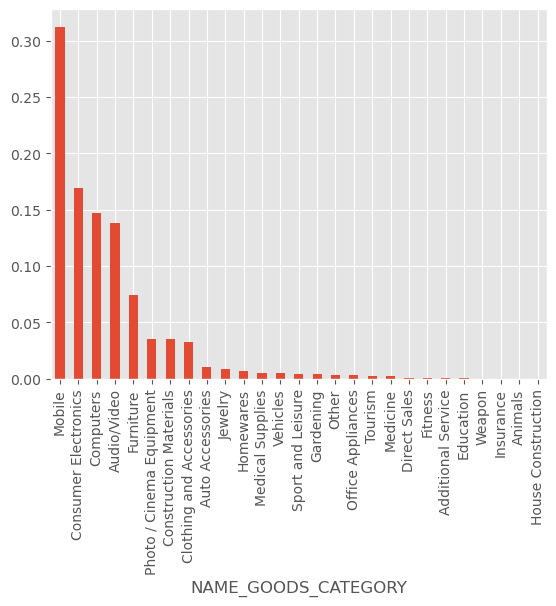

In [78]:
# Analysing NAME_GOODS_CATEGORY column

df_previous['NAME_GOODS_CATEGORY'].value_counts(normalize=True).plot.bar()

Majority of the loans were approved for the Moblie loans followed by Consumer Electronics and Computers, while Insurance, Animals and House Construction were the lowest. 


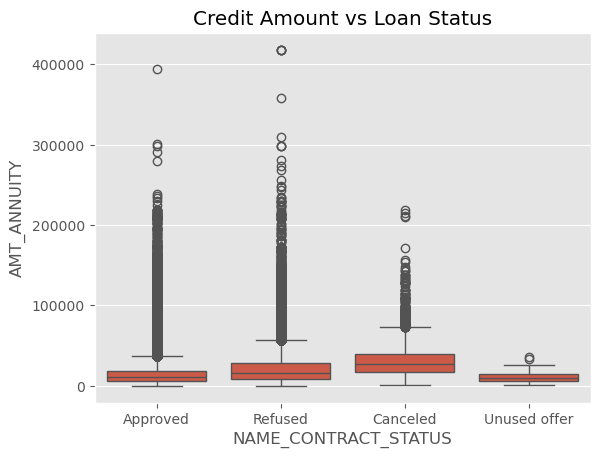

In [79]:
# Bivariate Analysis on categorical variables vs numerical variable
# AMT_ANNUITY vs NAME_CONTRACT_STATUS

sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_ANNUITY', data=df_previous)
plt.title('Credit Amount vs Loan Status')
plt.show()

### Selecting important columns from df_current and then merging it with the df_previous for further analysis


In [80]:
important_columns =['AGE_GROUP', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'DAYS_EMPLOYED', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'ORGANIZATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'SK_ID_CURR', 'TARGET']

df_application_imp = df_current[important_columns]

print(df_application_imp.shape)


(306562, 23)


In [81]:
# Merging the two dataframes
df_application_imp = df_application_imp.merge(df_previous, on='SK_ID_CURR', how='left')
print(df_application_imp.shape)

(1426946, 59)


In [82]:
df_application_imp.head()

,AGE_GROUP,AMT_ANNUITY_x,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_EMPLOYED,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE_x,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,ORGANIZATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,Young,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,1.0,M,-637,N,Y,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Business Entity Type 3,2,2,100002,1,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,NaN,Approved,-606.0,NaN,NaN,NaN,New,Vehicles,POS,NaN,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,Mid Age,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,2.0,F,-1188,N,N,Cash loans,Higher education,Married,House / apartment,State servant,School,1,1,100003,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,NaN,Approved,-746.0,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1.0,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,Mid Age,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,2.0,F,-1188,N,N,Cash loans,Higher education,Married,House / apartment,State servant,School,1,1,100003,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,NaN,Approved,-828.0,Cash through the bank,NaN,Family,Refreshed,Furniture,POS,NaN,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,Mid Age,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,2.0,F,-1188,N,N,Cash loans,Higher education,Married,House / apartment,State servant,School,1,1,100003,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,NaN,Approved,-2341.0,Cash through the bank,NaN,Family,Refreshed,Consumer Electronics,POS,NaN,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,Mid Age,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,1.0,M,-225,Y,Y,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,Government,2,2,100004,0,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,NaN,Approved,-815.0,Cash through the bank,NaN,Unaccompanied,New,Mobile,POS,NaN,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


<Axes: ylabel='NAME_CASH_LOAN_PURPOSE'>

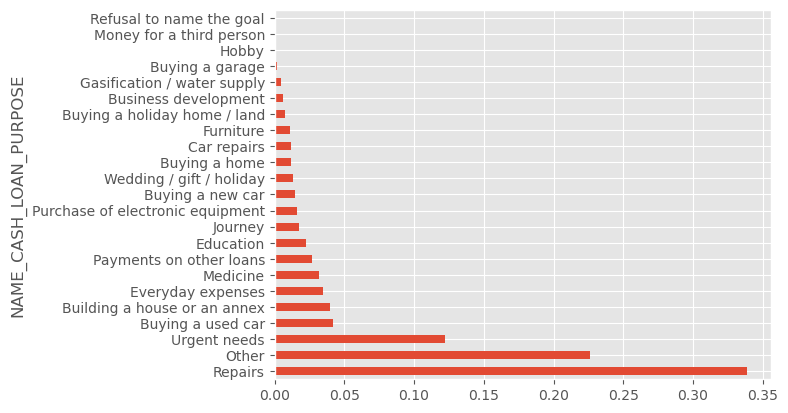

In [83]:
# Cash loan purpose distribution

df_application_imp['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True).plot.barh()

Most cash loan applications are submitted for 'Repairs.' The second most common purpose is 'Others,' followed by 'Urgent Needs.' There are relatively few applications where the purpose of the loan is not disclosed. The least common reasons for cash loans are 'Money for a third person' and 'Hobby.'

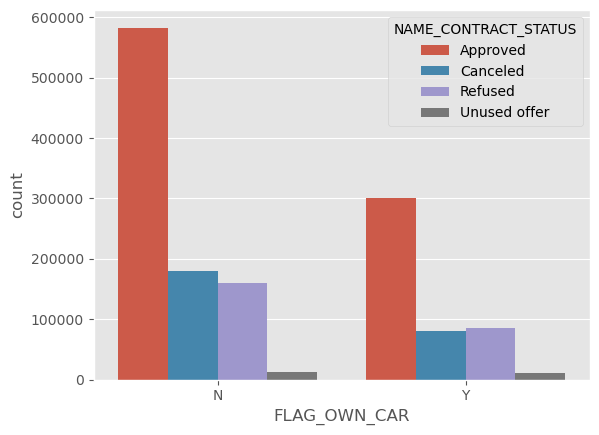

In [84]:
# FLAG_OWN_CAR vs NAME_CONTRACT_STATUS

sns.countplot(x="FLAG_OWN_CAR", hue="NAME_CONTRACT_STATUS", data = df_application_imp)
plt.show()


Even if the client owns or not owns the car there is not much difference in terms of Approved loan satus
but one thing can be observed that the people who don't own a car seems to apply for loan more than the ones who own the car

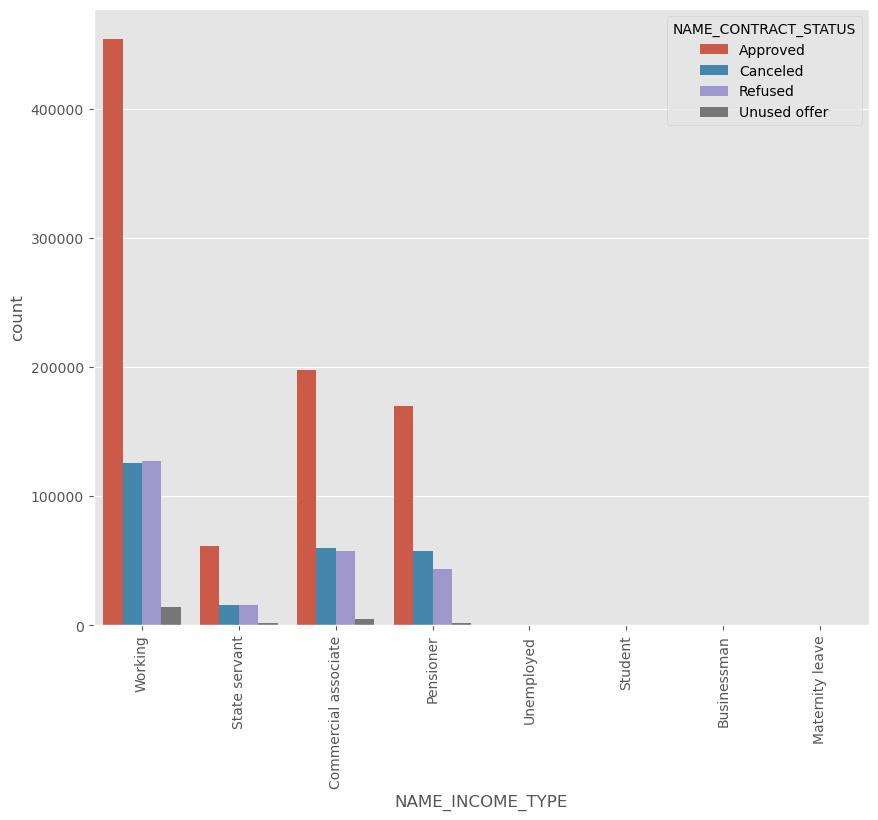

In [85]:
# FLAG_INCOME_TYPE vs NAME_CONTRACT_STATUS
plt.figure(figsize=(10,8))
sns.countplot(x="NAME_INCOME_TYPE", hue="NAME_CONTRACT_STATUS", data = df_application_imp)
plt.xticks(rotation=90)
plt.show()

### Couple of inferences can be made from the chart

- People who work and earn tends to apply for loans the most and there is a high chance that the loan gets approved
- Unemployed, studentsj, businessman and Meternity leave people don't have the tendancy to apply for loans
- People who are earning apply for loans and they get approve there is less chance comparitively that the loan is cancelled or refused.


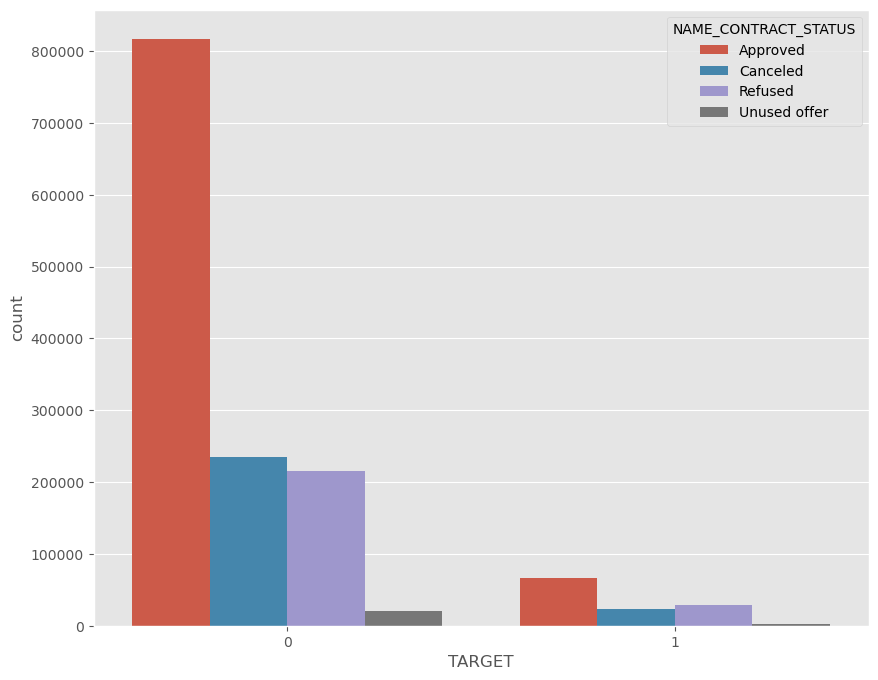

In [86]:
# Target vs NAME_CONTRACT_STATUS
plt.figure(figsize=(10,8))
sns.countplot(x="TARGET", hue="NAME_CONTRACT_STATUS", data = df_application_imp)
plt.show()

### Inferences we make from the above chart
- There are less number of defaulters compared to non_defaulters
- Maximum of the loans approved are paid on time and they come under non-defaulters category
- Also we can see a lot of loans for non defaulters are refused or cancelled which utimately results in loss of business for the company.


<Axes: xlabel='NAME_CONTRACT_STATUS'>

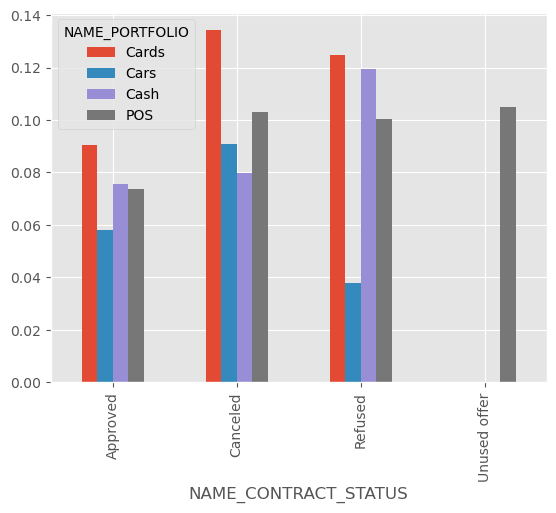

In [87]:
df_application_imp.pivot_table(columns='NAME_PORTFOLIO', index='NAME_CONTRACT_STATUS', values='TARGET', aggfunc='mean').plot.bar()

### Inferences made from above chart is
- Most of the client were defaulted who applied previously for the card
- People who applied for car loans and the loan was approved, they were least defaulted
- Also for Refused loans the car loans were least defaulted. 


In [88]:
df_application_imp.TARGET.value_counts(normalize=True)*100

TARGET
0    91.377039
1     8.622961
Name: proportion, dtype: float64

# Conclusions for CREDIT EDA Analysis


- Approximately there is a chance of 8.62% of loans being defaulted in the current scenarios. 
- When we see the number of loans applied then we notice there are female clients who applied the loans more than males.
- Married client are safer to give loans as there tendency of defaulting the loans is less while single and not married clients are more likely to default loans.
- Client whose previous loans were either rejected or cancelled seems more likely to default again.
- The higher the age, the higher the chance of less defaulting the loan, as we can see younger age people having age less than 30 tends to default loans more.
- People who apply for car loans have a tendancy to default loans lesser in comparision to other like Cards.